In [8]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries are installed and ready!")

All libraries are installed and ready!


In [9]:
import pandas as pd
df = pd.read_csv("/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.info()
print("Data shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
Data shape: (20640, 10)


Target Variable for Regression:

- The column "medianHouseValue" is chosen as the target variable.
- It is a continuous numeric column suitable for predicting house prices.
- All other columns will be used as features (X) to train the regression model.

In [30]:
# Handle Missing Values
# Fill missing entries in 'total_bedrooms' with the median
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [12]:
# Step 4: Feature Encoding
df = pd.get_dummies(df, columns=["ocean_proximity"])
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                   False                   False   
1   

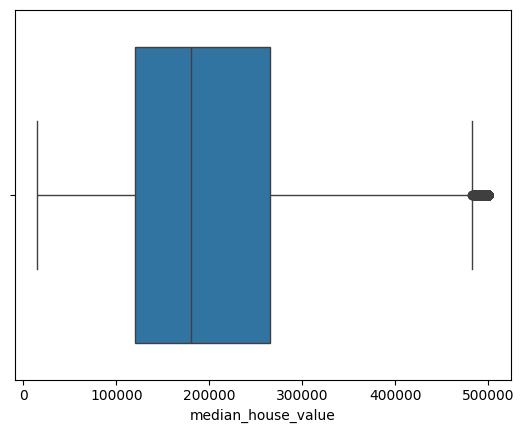

In [13]:
sns.boxplot(x=df["median_house_value"])
plt.show()

In [14]:
# Scaling and Splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features (X) and target variable (y)
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler (fit on training data only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (16512, 13)
Test set shape: (4128, 13)


In [15]:
# Regression Task: Linear Regression (Predicting a Continuous Value)
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

#  Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 4908476721.156623
RMSE: 70060.52184473524
R²: 0.6254240620553602


In [16]:
# Logistic Regression Classifier
# Heart Disease Dataset

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# 1. Load the dataset
df = pd.read_csv("/content/Heart_Disease_Prediction.csv")

# 2. Convert target to numeric: 'Absence' -> 0, 'Presence' -> 1
df["Heart Disease"] = df["Heart Disease"].map({"Absence": 0, "Presence": 1})

# 3. Separate Features and Target
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

# 4. Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Initialize & Train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# 7. Make predictions
y_pred = log_model.predict(X_test_scaled)

# 8. Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Logistic Regression Results")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)


Logistic Regression Results
Accuracy: 0.9074074074074074
Confusion Matrix:
 [[31  2]
 [ 3 18]]
Precision: 0.9
Recall: 0.8571428571428571


In [32]:
# Decision Tree Classifier
# Heart Disease Dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# 1. Load the dataset
df = pd.read_csv("/content/Heart_Disease_Prediction.csv")

# 2. Convert target to numeric: 'Absence' -> 0, 'Presence' -> 1
df["Heart Disease"] = df["Heart Disease"].map({"Absence": 0, "Presence": 1})

# 3. Separate Features and Target
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

# 4. Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Initialize & Train the model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 6. Make predictions
y_pred = tree_model.predict(X_test)

# 7. Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Decision Tree Results")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)


Decision Tree Results
Accuracy: 0.6851851851851852
Confusion Matrix:
 [[22 11]
 [ 6 15]]
Precision: 0.5769230769230769
Recall: 0.7142857142857143


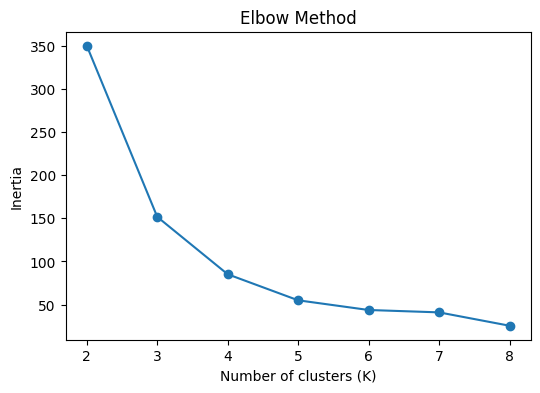

Silhouette Score: 0.5431801211946358


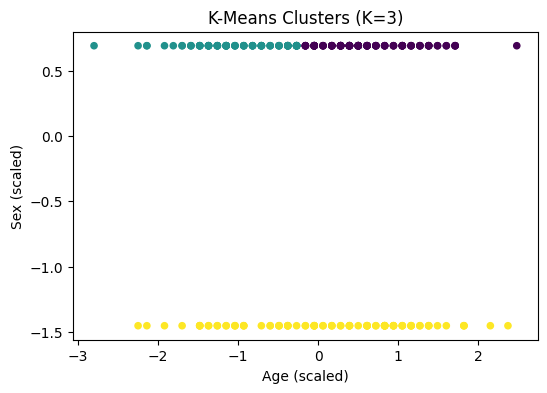

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 🔹 1️⃣ اختيار أول عمودين رقميين تلقائيًا من الداتا سيت
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols[:2]].fillna(df[numeric_cols[:2]].median())  # تعويض NaN بالmedian

# 🔹 2️⃣ Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 3️⃣ Elbow Method لتحديد K
inertia = []
K_range = range(2, 9)  # نجرب K من 2 لـ 8
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# 🔹 4️⃣ اختيار K يدوي بعد الرسم
k_optimal = 3  # اختاري K مناسب من الرسم
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# 🔹 5️⃣ حساب Silhouette Score
score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", score)

# 🔹 6️⃣ Visualization
plt.figure(figsize=(6,4))
plt.scatter(
    X_scaled[:,0],  # أول عمود رقمي
    X_scaled[:,1],  # ثاني عمود رقمي
    c=cluster_labels,
    cmap='viridis',
    s=20
)
plt.xlabel(numeric_cols[0] + " (scaled)")
plt.ylabel(numeric_cols[1] + " (scaled)")
plt.title(f"K-Means Clusters (K={k_optimal})")
plt.show()
